# Introduction to machine learning

*Maxime Sangnier*

Fall, 2023

## Practical session 1: discriminant analysis, logistic regression and boosting

# Table of contents
1. [Discriminant analysis](#part1)
    - [Linear discriminant analysis](#part1sec1)
    - [Quadratic discriminant analysis](#part1sec2)
    - [Fisher discriminant analysis](#part1sec3)
1. [Logistic regression](#part2)
1. [Adaboost](#part3)


In [3]:
from mllab import *


Packages:
	nympy as np
	matplotlib.pyplot as plt
	seaborn as sns

Functions:
	plotXY
	plot_frontiere
	map_regions
	covariance
	plot_cov
	sample_gmm
	scatter
	plot_level_set
	gaussian_sample



# Discriminant analysis <a id="part1"></a>
## Linear discriminant analysis <a id="part1sec1"></a>
>The `covariance` function makes it possible to build a $2 \times 2$ covariance matrix based on spreads $\sigma_1$ and $\sigma_2$, and the angle $\theta$.

In [5]:
covariance?

Signature: covariance(sigma1=1.0, sigma2=1.0, theta=0.0)
Docstring: Covariance matrix with eigenvalues sigma1 and sigma2, rotated by the angle theta.
File:      c:\users\eline\onedrive\bureau\m2a\introduction to ml\mllab.py
Type:      function

>Based on the Cholesky decomposition of a $2 \times 2$ covariance matrix $\Sigma$, write a function that generates a multivariate Gaussian $n$-sample of mean $\mu \in \mathbb R^2$ and covariance $\Sigma$.
The corresponding numpy array should be of size $(n, 2)$.

>Compute the mean and the empirical covariance of the sample using Numpy routines.

In [6]:
import numpy as np

In [28]:
# Answer
def gaussian_sample(mu=[0, 0], sigma1=1., sigma2=1., theta=0., n=50):
    # Todo
    Z = np.random.randn(n,2)
    sigma = covariance(sigma1, sigma2, theta)
    L = np.linalg.cholesky(sigma)
    X = Z.dot(L) + mu

    # L = np.linalg.cholesky(covariance(sigma1, sigma2, theta))
    # X = np.random.randn(n,2) @ L.T + np.array(mu)
    # End todo
    return X
gaussian_sample()
# Todo
sample = gaussian_sample()
print("sample : \n", sample)
mu_sample = sample.mean(axis=0)
sigma_sample = np.cov(sample.T)

print("mu_n = ", mu_sample, "\nsigma_n = ", sigma_sample)
# End todo

sample : 
 [[-3.62337512e-01  5.76757982e-01]
 [-7.46364030e-04  1.77442161e-01]
 [-2.06593429e-01 -3.85910541e-01]
 [-1.32388768e+00  2.69342700e+00]
 [ 1.13512075e+00 -3.65603548e-01]
 [-5.32482406e-01 -1.27028268e+00]
 [-7.45447091e-01 -1.51262078e+00]
 [ 1.64347545e-02 -2.18267417e-01]
 [-1.01065477e+00  1.18539727e+00]
 [ 3.10586191e-01 -4.56095298e-01]
 [ 1.85763128e+00 -9.40812377e-01]
 [ 1.06324014e+00 -1.19707487e+00]
 [-9.79261972e-01  6.53314449e-01]
 [-1.06373890e+00 -4.33986947e-01]
 [-2.73418259e-01  1.88643141e+00]
 [-2.55656089e-01  2.03504732e+00]
 [-9.60384843e-01  7.76971336e-01]
 [ 6.66285557e-01  7.69286792e-01]
 [ 8.57830839e-01  1.07029983e+00]
 [-6.09787318e-01  9.68645447e-01]
 [-5.80704653e-01  2.45396682e-01]
 [ 4.80089910e-01  5.49121243e-01]
 [-6.76594425e-02  6.68824991e-01]
 [-7.57343695e-01  2.57264611e-01]
 [ 1.84298053e-01 -1.37747693e+00]
 [ 5.12750602e-01  5.16548048e-01]
 [ 1.61834897e-01  1.25243397e+00]
 [-2.32594487e+00  3.09571468e-01]
 [ 5.2938

>Generate two multivariate Gaussian samples of size $n_1 = n_2 = 50$ with different means and equal covariance matrices.
Plot both samples with different markers by using the function `plotXY`.

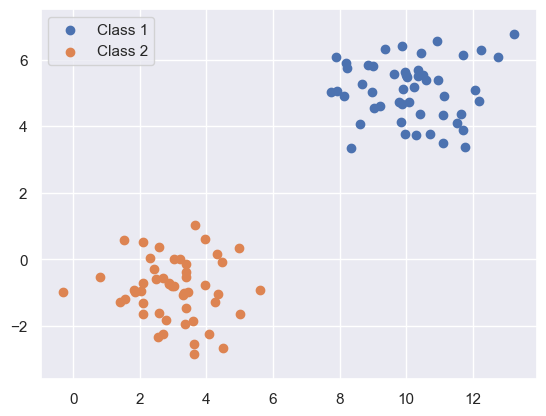

In [30]:
# Answer
n = 50
sigma1=1.5
sigma2=1
mu_1 = [10, 5]
mu_2 = [3, -1]
group_1 = gaussian_sample(mu_1, sigma1, sigma2, theta = 0)
group_2 = gaussian_sample(mu_2, sigma1, sigma2, theta = 0)
plotXY(group_1, group_2)

>Write a function that creates and returns two Numpy arrays `X` and `y` such that `X` is the data matrix (of size $n \times 2$) and `y` is the vector of labels (of size $n$, with values $\pm 1$) corresponding to i.i.d. copies of $(X, Y)$ distributed such that:
$$
    \begin{cases}
        \forall i \in \{\pm 1\}: X~|~Y=i \sim \mathcal N (\mu_i, \Sigma_i)\\
        \mathbb P(Y=1) = \pi, \mathbb P(y=-1)=1-\pi.
    \end{cases}
$$
>
>Create a dataset of size $n=100$.

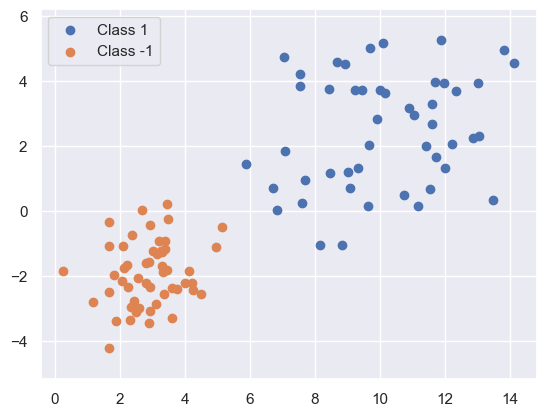

In [42]:
# Answer
def sample_classif(weight=0.5,
                   param1=dict(mu=[0, 0], sigma1=1., sigma2=1.),
                   param2=dict(mu=[0, 0], sigma1=1., sigma2=1.),
                   n=50):
    Y = 2 * np.random.binomial(n=1, p=weight, size=n) - 1  # Labels 1 or -1
    # Todo
    n1 = np.sum(Y==1)
    n0 = len(Y) - n1
    X = np.zeros((n, 2))
    X[Y==1] = gaussian_sample(**param1, n = n1)
    X[Y == -1] = gaussian_sample(**param2, n = n0)
    # End todo
    return X, Y

# Todo
X, Y = sample_classif(weight=0.5, param1=dict(mu=[10, 3], sigma1=5, sigma2=3),
                   param2=dict(mu=[3, -2], sigma1=1, sigma2=1.),
                   n=100)
plotXY(X,Y)
# End todo

>Based on the following code, implement a linear discriminant classifier, taking as parameters an $n \times 2$ Numpy array as data and a size-$n$ array of labels.

In [59]:
# Answer
from sklearn.base import BaseEstimator
from sklearn.discriminant_analysis import LinearClassifierMixin

class LDA(BaseEstimator, LinearClassifierMixin):
    """
        LDA classifier for two classes.
    """
    def __init__(self, bias=False):
        """
            bias: default normalization (False) of the covariance matrix
            estimator is by ``(N - 2)``, where ``N`` is the number of
            observations given (unbiased estimate). If `bias` is True,
            then normalization is by ``N``.
        """
        self.bias = bias
        self.yvalues_ = None
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self, X, y,):
        self.yvalues_ = np.unique(y)
        assert self.yvalues_.size==2
        # Estimate covariance matrix and means
        n_pos, n = np.sum(y == self.yvalues_[1]), X.shape[0]  # Number of positive labels and size of the dataset
        # Todo
        emp_covariance = np.cov(X.T)
        emp_mean_1 = X[Y==1].mean(axis = 0)
        emp_mean_2 = X[Y==-1].mean(axis = 0)
        # End todo
        # Compute direction and intercept
        # Todo
        cov_inv = np.linalg.inv(emp_covariance)
        pi1 = np.sum(y== self.yvalues_[1])/n
        pi2 = np.sum(y== self.yvalues_[0])/n
        w = cov_inv@(emp_mean_1 - emp_mean_2)
        b = 0.5*(emp_mean_2.T@cov_inv@emp_mean_2 - emp_mean_1.T@cov_inv@emp_mean_1) + np.log(pi1/pi2)

        self.coef_ = w
        self.intercept_ = b
        # End todo
        return self

    def decision_function(self, X):
        # Compute decisions
        # Todo
        decisions = self.coef_@X.T + self.intercept_
        # End todo
        return decisions

    def predict(self, X):
        # Compute predictions
        predictions = np.ones(X.shape[0]) * self.yvalues_[0]  # Negative label
        # Todo
        predictions = self.yvalues_[1] if decision_function(X) > 0 else self.yvalues_[0]
        #sign(w.t@x + b)
        # End todo
        return predictions

>Fit a linear discriminant classifier on the data `X,y`.
Plot the data along with the classifier frontiere (use the function `plot_frontiere`).

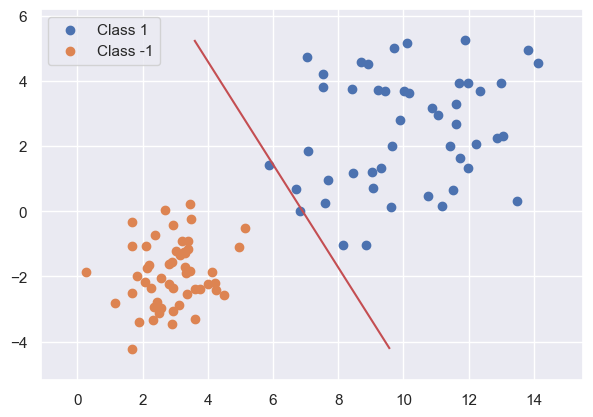

In [63]:
# Answer
lda = LDA()
fit = lda.fit(X,Y)
plot_frontiere(lda, data=X, data_labels=Y, label=None, num=500, figure=True)

>Compare the result of [scikit-learn LDA](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis) (decision function and frontiere).

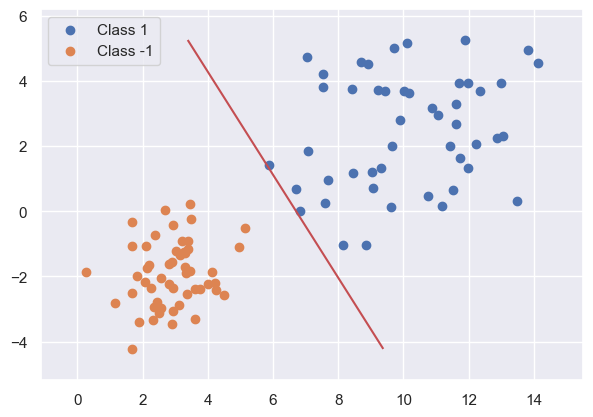

In [68]:
# Answer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X, Y)
plot_frontiere(clf, data=X, data_labels=Y, label=None, num=500, figure=True)

## Quadratic discriminant analysis <a id="part1sec2"></a>
>Analyze the behavior of LDA and [QDA](http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis.html#sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis) when it is faced to anisotropic Gaussian samples (in particular, check if the frontiere is the bisector of the line segment for which the extremities are both class centers), and then to Gaussian samples with different covariance matrices (you can use `plot_frontiere` with a list of classifiers).

In [ ]:
# Answer
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()

# Gassian parameters
mu1 = [0, 0]
mu2 = [5, 3]

plt.figure(figsize=(20, 20))
for ifig, (param1, param2) in enumerate([(dict(mu=mu1, sigma1=1, sigma2=1, theta=0), dict(mu=mu2, sigma1=1, sigma2=1, theta=0)),
                                         (dict(mu=mu1, sigma1=1, sigma2=5, theta=0), dict(mu=mu2, sigma1=1, sigma2=5, theta=0)),
                                         (dict(mu=mu1, sigma1=1, sigma2=5, theta=np.pi/6), dict(mu=mu2, sigma1=1, sigma2=5, theta=np.pi/6)),
                                         (dict(mu=mu1, sigma1=1, sigma2=5, theta=0), dict(mu=mu2, sigma1=5, sigma2=1, theta=0)),
                                         (dict(mu=mu1, sigma1=1, sigma2=5, theta=0), dict(mu=mu2, sigma1=5, sigma2=1, theta=np.pi/3))]):
    # Dataset
    # Todo

    # End todo
    
    # Discriminant analysis
    # Todo

    # End todo
    
    # Class means
    # Todo

    # End todo
    
    # Plot frontieres and class means
    # Todo

    # End todo

## Fisher discriminant analysis <a id="part1sec3"></a>
>Implement the Fisher discriminant analysis based on the following code.
In practice, what is the difference between LDA and FisherDA?

In [ ]:
# Answer
class FisherDA(BaseEstimator, LinearClassifierMixin):
    """
        Fisher discriminant analysis for two classes.
    """
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None
        
    def fit(self, X, y):
        # Estimate prior, covariance matrix and means
        # To do

        # End todo
        
        # Compute direction and intercept
        # Todo

        # End todo
        self.intercept_ = 0
        
        ypred = self.decision_function(X)
        ind = np.argsort(ypred)
        err = np.cumsum(y[ind]) + np.sum(y==y.min())
        #plt.figure()
        #plt.plot(ypred[ind], err)  # Error
        iintercept = np.argmin(err)
        if iintercept < y.size-1:
            self.intercept_ = -0.5*(ypred[ind[iintercept]] + ypred[ind[iintercept+1]])
        else:
            self.intercept_ = -ypred[ind[iintercept]]
        return self

    def decision_function(self, X):
        # Compute decisions
        # Todo

        # End todo
        return decisions

    def predict(self, X):
        # Compute predictions
        # Todo

        # End todo
        return predictions

In [ ]:
# Answer

# Logistic regression <a id="part2"></a>
>We consider that
$$
    X|Y=1 \sim \mathcal N(0, I)
    \qquad \text{and} \qquad
    X|Y=-1 \sim 0.5 \mathcal N\left(\begin{pmatrix} 5 \\ 3 \end{pmatrix}, I\right) + 0.5 \mathcal N\left(\begin{pmatrix} 8 \\ 9 \end{pmatrix}, I\right)
    \quad \text{(non-Gaussian class)}.
$$
Compare LDA and [logistic regression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).

In [ ]:
# Answer

>What about with this dataset (class $-1$ is Gaussian but with an outlier)?

In [13]:
# Dataset
X, Y = sample_classif(weight=.5,
                      param1=dict(mu=[0, 0], sigma1=1, sigma2=1, theta=0),
                      param2=dict(mu=[5, 3], sigma1=1, sigma2=1, theta=0),
                      n=100)
X[np.argmin(Y)] = np.random.randn(2) + 20

In [ ]:
# Answer

# Adaboost <a id="part3"></a>
>We consider the dataset defined below.

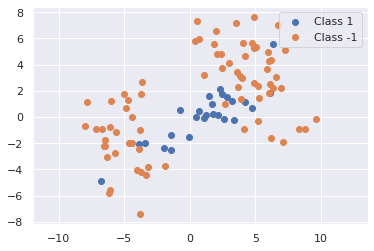

In [15]:
# Dataset
X, Y = sample_classif(weight=.3,
                      param1=dict(mu=[0, 0], sigma1=10, sigma2=1, theta=np.pi/6),
                      param2=dict(mu=[0, 0], sigma1=1, sigma2=1, theta=0),
                      n=100)

X_ng, Y_ng = sample_classif(weight=0.5,
                            param1=dict(mu=[5, 3], sigma1=3, sigma2=10, theta=np.pi/6),
                            param2=dict(mu=[-5, -2], sigma1=3, sigma2=10, theta=np.pi/10),
                            n=X.shape[0])

X[Y==-1] = X_ng[:np.sum(Y==-1)]

plotXY(X, Y)

>Fit an [Adaboost](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) classifier with $100$ weak learners and the algorithm SAMME.
Map the classifier regions on a figure.

In [ ]:
# Answer

>Plot on a new figure the estimator errors (attribute `estimator_errors_`).
What do you observe?

In [ ]:
# Answer

>Load the [dataset digits](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html#sklearn.datasets.load_digits).
How many observations, covariates and classes has it?
[Split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) the dataset into two equally sized subsets (one for training, the other for testin, i.e. estimating the true error).

In [ ]:
# Answer

>Plot the train and test errors of both algorithms SAMME and SAMME.R with respect to the number of iterations (from 1 to 200) for the dataset digits.
For this purpose, use [`DecisionTreeClassifier(max_depth=5)`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) as base learner.

In [ ]:
# Answer